✅ What is Persistence in LangGraph?

Persistence in LangGraph means:

👉 Your AI agent can save its memory/state somewhere,
so that even if the program stops, restarts, or crashes,
it can continue from the exact same point next time.



## Advantages: 

### short term memory
### Fault Tolerance
### HITL
### Time Travel

In [46]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [47]:
load_dotenv()

True

In [48]:
model=ChatGroq(model='llama-3.1-8b-instant')

In [49]:
model.invoke('hy').content

'Hello. Is there something I can help you with?'

In [50]:
class JokeState(TypedDict): 
    topic: str
    joke: str
    explanation: str
    

In [51]:
def generate_joke(state: JokeState): 
    prompt=f'generate a joke on topic: {state['topic']}'
    joke=model.invoke(prompt).content
    return {'joke': joke}

In [52]:
def explanation_joke(state: JokeState): 
    prompt=f"Explain the the given jjoke of topic: {state['topic']} and joke: {state['joke']}"
    explanation=model.invoke(prompt).content
    return {'explanation': explanation}

In [53]:
graph=StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('explanation_joke', explanation_joke)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'explanation_joke')
graph.add_edge('explanation_joke', END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)

In [54]:
config1={'configurable': {'thread_id': '1'}}
initial_state={'topic': 'pizza'}
final_state=workflow.invoke(initial_state, config=config1)

In [55]:
final_state

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little crusty.',
 'explanation': 'This joke is a play on words, which is a common technique used in wordplay jokes. The punchline "Because it was feeling a little crusty" has a double meaning:\n\n1. A pizza crust is the outer layer of a pizza, made from bread dough. In this context, "crusty" refers to the pizza\'s physical composition.\n2. The phrase "feeling a little crusty" is also a common idiomatic expression meaning feeling unwell or grumpy, often used to describe someone who is irritable or cranky.\n\nThe joke relies on this wordplay to create a pun, using the multiple meanings of "crusty" to create a humorous connection between the setup (the pizza going to the doctor) and the punchline. The joke requires a quick mental shift to understand the double meaning of "crusty," which creates the comedic effect.'}

In [56]:
workflow.get_state(config=config1)       # it will return current state of the graph

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is a play on words, which is a common technique used in wordplay jokes. The punchline "Because it was feeling a little crusty" has a double meaning:\n\n1. A pizza crust is the outer layer of a pizza, made from bread dough. In this context, "crusty" refers to the pizza\'s physical composition.\n2. The phrase "feeling a little crusty" is also a common idiomatic expression meaning feeling unwell or grumpy, often used to describe someone who is irritable or cranky.\n\nThe joke relies on this wordplay to create a pun, using the multiple meanings of "crusty" to create a humorous connection between the setup (the pizza going to the doctor) and the punchline. The joke requires a quick mental shift to understand the double meaning of "crusty," which creates the comedic effect.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoin

In [ ]:
list(workflow.get_state_history(config=config1))  # Get the history of the state of the graph

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is a play on words, which is a common technique used in wordplay jokes. The punchline "Because it was feeling a little crusty" has a double meaning:\n\n1. A pizza crust is the outer layer of a pizza, made from bread dough. In this context, "crusty" refers to the pizza\'s physical composition.\n2. The phrase "feeling a little crusty" is also a common idiomatic expression meaning feeling unwell or grumpy, often used to describe someone who is irritable or cranky.\n\nThe joke relies on this wordplay to create a pun, using the multiple meanings of "crusty" to create a humorous connection between the setup (the pizza going to the doctor) and the punchline. The joke requires a quick mental shift to understand the double meaning of "crusty," which creates the comedic effect.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoi

In [60]:
config2={'configurable': {'thread_id': '2'}}
final_state=workflow.invoke({'topic': 'samosa'}, config=config2)

In [61]:
final_state

{'topic': 'samosa',
 'joke': 'Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.',
 'explanation': 'This joke is a play on words, with multiple layers of puns and wordplay. Here\'s a breakdown:\n\n1. **Crumby**: A samosa is a type of Indian fried or baked pastry snack that is typically crumbly in texture. So, the joke starts by referencing its texture.\n2. **Folded emotions**: A samosa is also known for its folded shape, which is created by folding the dough multiple times to give it its characteristic shape. The joke is making a pun on the phrase "folded emotions," which is a common phrase used to describe complex emotions, but in this case, it\'s also referring to the physical folding of the samosa dough.\n\nThe punchline is funny because it\'s a clever play on words that combines the texture and shape of a samosa with a common phrase used in therapy to describe emotional issues. It\'s a lighthearted and silly joke that pokes fun at 

In [ ]:
list(workflow.get_state_history(config=config2))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of folded emotions.', 'explanation': 'This joke is a play on words, with multiple layers of puns and wordplay. Here\'s a breakdown:\n\n1. **Crumby**: A samosa is a type of Indian fried or baked pastry snack that is typically crumbly in texture. So, the joke starts by referencing its texture.\n2. **Folded emotions**: A samosa is also known for its folded shape, which is created by folding the dough multiple times to give it its characteristic shape. The joke is making a pun on the phrase "folded emotions," which is a common phrase used to describe complex emotions, but in this case, it\'s also referring to the physical folding of the samosa dough.\n\nThe punchline is funny because it\'s a clever play on words that combines the texture and shape of a samosa with a common phrase used in therapy to describe emotional issues. It\'s a lighthearted and silly jok

In [65]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is a play on words, which is a common technique used in wordplay jokes. The punchline "Because it was feeling a little crusty" has a double meaning:\n\n1. A pizza crust is the outer layer of a pizza, made from bread dough. In this context, "crusty" refers to the pizza\'s physical composition.\n2. The phrase "feeling a little crusty" is also a common idiomatic expression meaning feeling unwell or grumpy, often used to describe someone who is irritable or cranky.\n\nThe joke relies on this wordplay to create a pun, using the multiple meanings of "crusty" to create a humorous connection between the setup (the pizza going to the doctor) and the punchline. The joke requires a quick mental shift to understand the double meaning of "crusty," which creates the comedic effect.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoi

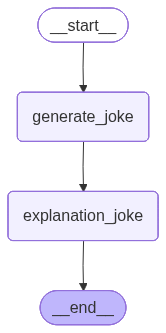

In [58]:
workflow

## Time Travel

In [ ]:
workflow.get_state({'configurable': {'thread_id':'1', 'checkpoint_id': '1f0c4f99-a011-64e5-8000-e9fe949f4853'}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0c4f99-a011-64e5-8000-e9fe949f4853'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-11-19T03:41:15.814832+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4f99-a00c-66c5-bfff-10d77a503b00'}}, tasks=(PregelTask(id='38973955-5908-0087-4cf4-89925665d650', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the pizza go to the doctor?\n\nBecause it was feeling a little crusty.'}),), interrupts=())

In [72]:
workflow.invoke(None,{'configurable': {'thread_id':'1', 'checkpoint_id': '1f0c4f99-a011-64e5-8000-e9fe949f4853'}} )

{'topic': 'pizza',
 'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.',
 'explanation': 'This joke is a play on words, using a pun to create humor. Here\'s a breakdown:\n\n- The topic is pizza.\n- The joke sets up a situation where the pizza is in a bad mood.\n- The punchline is: "Because it was feeling a little crusty."\n- The word "crusty" has a double meaning here:\n  - In this context, "crusty" is an adjective that can describe someone or something that is feeling irritable or in a bad mood, similar to how we might say someone is "feeling a little grumpy."\n  - However, "crusty" is also a characteristic of pizza crust, which is usually crispy or crunchy in texture.\n\nThe joke relies on this wordplay to create a pun, connecting the idea of the pizza\'s emotional state ("feeling a little crusty") to the actual texture of the pizza crust. This unexpected twist creates a lighthearted and amusing connection between the setup and the punchline.'}

In [77]:
list(workflow.get_state_history({'configurable': {'thread_id':'1'}}))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is a play on words, using a pun to create humor. Here\'s a breakdown:\n\n- The topic is pizza.\n- The joke sets up a situation where the pizza is in a bad mood.\n- The punchline is: "Because it was feeling a little crusty."\n- The word "crusty" has a double meaning here:\n  - In this context, "crusty" is an adjective that can describe someone or something that is feeling irritable or in a bad mood, similar to how we might say someone is "feeling a little grumpy."\n  - However, "crusty" is also a characteristic of pizza crust, which is usually crispy or crunchy in texture.\n\nThe joke relies on this wordplay to create a pun, connecting the idea of the pizza\'s emotional state ("feeling a little crusty") to the actual texture of the pizza crust. This unexpected twist creates a lighthearted and amusing connection between the setup and t

## updating state

In [79]:
workflow.update_state({'configurable': {'thread_id':'1', 'checkpoint_id': '1f0c4f99-a011-64e5-8000-e9fe949f4853', 'checkpoint_ns': ''}}, {'topic': 'icecream'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0c4fd6-ca60-6fd3-8001-66675efbec07'}}

In [80]:
list(workflow.get_state_history({'configurable': {'thread_id':'1'}}))

[StateSnapshot(values={'topic': 'icecream'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4fd6-ca60-6fd3-8001-66675efbec07'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-11-19T04:08:37.707771+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4f99-a011-64e5-8000-e9fe949f4853'}}, tasks=(PregelTask(id='3740bc3d-8877-5e56-68eb-bf90505133cf', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', 'explanation': 'This joke is a play on words, using a pun to create humor. Here\'s a breakdown:\n\n- The topic is pizza.\n- The joke sets up a situation where the pizza is in a bad mood.\n- The punchline is: "Because it was feeling a little crusty."

In [81]:
workflow.invoke(None, {'configurable': {'thread_id':'1', 'checkpoint_id': '1f0c4fd6-ca60-6fd3-8001-66675efbec07'}})

{'topic': 'icecream',
 'joke': 'Why did the ice cream go to therapy? \n\nBecause it had a meltdown.',
 'explanation': 'This joke is a play on words. The phrase "had a meltdown" has a double meaning here. \n\nIn a literal sense, a meltdown can occur when a container holding ice cream is exposed to heat, causing the ice cream to melt. So, the ice cream is literally experiencing a meltdown.\n\nHowever, "having a meltdown" is also a common idiomatic expression that means to completely lose control of one\'s emotions, often due to stress or anxiety. It\'s as if the person is breaking down or having a nervous breakdown.\n\nIn this joke, the punchline "had a meltdown" is a clever connection between the two meanings. It implies that the ice cream went to therapy because it was experiencing emotional turmoil (a meltdown), but the wordplay on the phrase makes it sound like the ice cream was literally melting.\n\nThis type of wordplay, known as a pun, is often used in jokes to create a clever and

In [82]:
list(workflow.get_state_history({'configurable': {'thread_id':'1'}}))

[StateSnapshot(values={'topic': 'icecream', 'joke': 'Why did the ice cream go to therapy? \n\nBecause it had a meltdown.', 'explanation': 'This joke is a play on words. The phrase "had a meltdown" has a double meaning here. \n\nIn a literal sense, a meltdown can occur when a container holding ice cream is exposed to heat, causing the ice cream to melt. So, the ice cream is literally experiencing a meltdown.\n\nHowever, "having a meltdown" is also a common idiomatic expression that means to completely lose control of one\'s emotions, often due to stress or anxiety. It\'s as if the person is breaking down or having a nervous breakdown.\n\nIn this joke, the punchline "had a meltdown" is a clever connection between the two meanings. It implies that the ice cream went to therapy because it was experiencing emotional turmoil (a meltdown), but the wordplay on the phrase makes it sound like the ice cream was literally melting.\n\nThis type of wordplay, known as a pun, is often used in jokes to

## Fault Tolerance

Fault Tolerance means:

👉 Your LangGraph workflow continues working even if something goes wrong
— like crashes, server shutdowns, network failures, or code errors.

When persistence is ON, LangGraph saves progress after every step (checkpoint).
So if anything fails, it can restart from the last saved step instead of starting from zero.

In [83]:

from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [84]:

# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [87]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [88]:

# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [89]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [90]:

# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [91]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4fe3-e030-6323-8003-757307d485fa'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-11-19T04:14:28.960745+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4fe3-e02b-64c7-8002-60318d8363da'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4fe3-e02b-64c7-8002-60318d8363da'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-19T04:14:28.958739+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0c4fe0-f75c-6330-8001-c3495b27ad5d'}}, tasks=(PregelTask(id='d9d3b6ee-f542-92d6-b4db-fc6d5009cd3